In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/phising-sites/malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.columns.isnull()

array([False, False])

In [4]:
df.dtypes

url     object
type    object
dtype: object

In [5]:
df.type

0           phishing
1             benign
2             benign
3         defacement
4         defacement
             ...    
651186      phishing
651187      phishing
651188      phishing
651189      phishing
651190      phishing
Name: type, Length: 651191, dtype: object

In [6]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

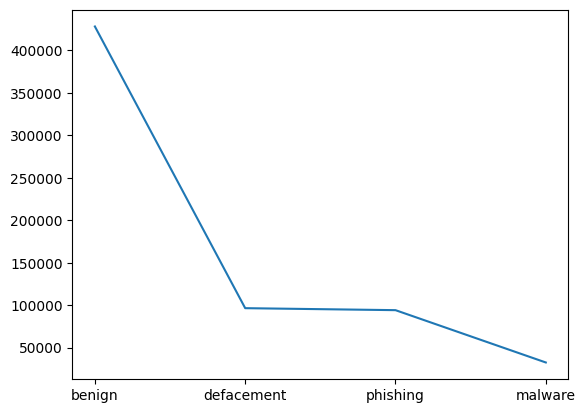

In [8]:
plt.plot(df['type'].value_counts())

<BarContainer object of 4 artists>

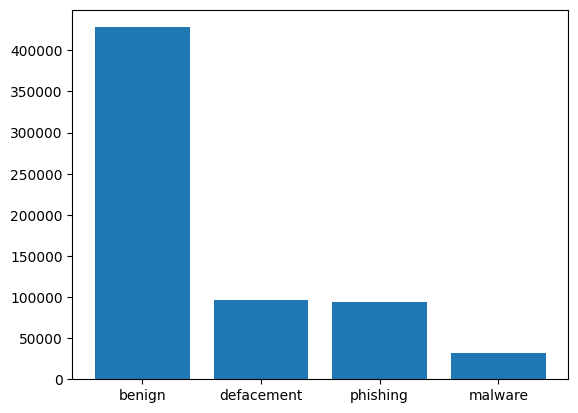

In [9]:
counts=df['type'].value_counts()
plt.bar(x=counts.index,height=counts)

In [10]:
df['url']=df['url'].replace('www.','',regex=True)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [11]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [12]:
df['url_type']=df['type'].replace({'benign':0,'defacement':1,'phishing':2,'malware':3})
df.head()

,url,type,url_type
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


In [13]:
def get_url_length(url):
    prefixes=['http://','https://']
    for prefix in prefixes:
        if url.startswith(prefix):
            url=url[len(prefix)]
            
    return len(url)

df['url_length']=df['url'].apply(lambda x:get_url_length(str(x)))
df.head()

,url,type,url_type,url_length
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1


In [14]:
import string

def count_letters(url):
    num_letters=sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits=sum(char.isdigit() for char in url)
    return num_digits

def count_special_characters(url):
    special_characters=set(string.punctuation)
    num_special_character=sum(char in special_characters for char in url)
    return num_special_character

In [15]:
df['letter_counts']=df['url'].apply(lambda x:count_letters(x))
df['digits_counts']=df['url'].apply(lambda x:count_digits(x))
df['special_characters_count']=df['url'].apply(lambda x:count_special_characters(x))
df.head()

,url,type,url_type,url_length,letter_counts,digits_counts,special_characters_count
0,br-icloud.com.br,phishing,2,16,13,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,29,1,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,25,1,5
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1,60,7,17
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1,199,22,14


In [16]:
import re
def has_shortening_service(url):
    pattern = re.compile(r'https?://(?:www\.)?(?:\w+\.)*(\w+)\.\w+')
    match = pattern.search(url)
    
    if match:
        domain = match.group(1)
        common_shortening_services = ['bit', 'goo', 'tinyurl', 'ow', 't', 'is',
                                      'cli', 'yfrog', 'migre', 'ff', 'url4', 'twit',
                                      'su', 'snipurl', 'short', 'BudURL', 'ping', 
                                      'post', 'Just', 'bkite', 'snipr', 'fic', 
                                      'loopt', 'doiop', 'short', 'kl', 'wp', 
                                      'rubyurl', 'om', 'to', 'bit', 't', 'lnkd', 
                                      'db', 'qr', 'adf', 'goo', 'bitly', 'cur', 
                                      'tinyurl', 'ow', 'bit', 'ity', 'q', 'is', 
                                      'po', 'bc', 'twitthis', 'u', 'j', 'buzurl','cutt', 'u', 'yourls', 'x', 'prettylinkpro', 
                                      'scrnch', 'filoops', 'vzturl', 'qr', '1url', 
                                      'tweez', 'v', 'tr', 'link', 'zip']
        
        if domain.lower() in common_shortening_services:
            return 1
    return 0 
                

In [17]:
df['shortend']=df['url'].apply(lambda x:has_shortening_service(x))
df.head()

,url,type,url_type,url_length,letter_counts,digits_counts,special_characters_count,shortend
0,br-icloud.com.br,phishing,2,16,13,0,3,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,29,1,5,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,25,1,5,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1,60,7,17,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1,199,22,14,0


In [18]:
from urllib.parse import urlparse
def abnormal_url(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc
    if netloc:
        netloc = str(netloc)
        match = re.search(netloc, url)
        if match:
            return 1
    return 0

In [19]:
df['abnormal_url']=df['url'].apply(lambda x:abnormal_url(x))
df.head()

,url,type,url_type,url_length,letter_counts,digits_counts,special_characters_count,shortend,abnormal_url
0,br-icloud.com.br,phishing,2,16,13,0,3,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,29,1,5,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,25,1,5,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1,60,7,17,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1,199,22,14,0,1


In [20]:
def secure_http(url):
    return int(urlparse(url).scheme == 'https')

In [21]:
df['secured_http']=df['url'].apply(lambda x:secure_http(x))
df.head()

,url,type,url_type,url_length,letter_counts,digits_counts,special_characters_count,shortend,abnormal_url,secured_http
0,br-icloud.com.br,phishing,2,16,13,0,3,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,29,1,5,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,25,1,5,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1,60,7,17,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1,199,22,14,0,1,0


In [22]:
import ipaddress
def have_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  # Invalid hostname or IP address

    return 0

In [23]:
df['ip']=df['url'].apply(lambda x:have_ip_address(x))
df.head()

,url,type,url_type,url_length,letter_counts,digits_counts,special_characters_count,shortend,abnormal_url,secured_http,ip
0,br-icloud.com.br,phishing,2,16,13,0,3,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,29,1,5,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,25,1,5,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,1,60,7,17,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,1,199,22,14,0,1,0,0


In [24]:
df.dtypes

url                         object
type                        object
url_type                     int64
url_length                   int64
letter_counts                int64
digits_counts                int64
special_characters_count     int64
shortend                     int64
abnormal_url                 int64
secured_http                 int64
ip                          object
dtype: object

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [26]:
x=df[['url_length','letter_counts','digits_counts','special_characters_count','shortend','abnormal_url','secured_http','ip']]
y=df['url_type']

In [27]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=model1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
classification_report=classification_report(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification report:",classification_report)

Accuracy: 0.8696012715085343
Classification report:               precision    recall  f1-score   support

           0       0.88      0.98      0.92     85778
           1       0.82      0.93      0.87     19104
           2       0.84      0.34      0.48     18836
           3       0.93      0.84      0.88      6521

    accuracy                           0.87    130239
   macro avg       0.87      0.77      0.79    130239
weighted avg       0.87      0.87      0.85    130239



In [29]:
sample_url_length=[ # Sample 1
    [30, 15, 3, 1, 1, 0, 1, 0]]

sample_url_type=model1.predict(sample_url_length)
print("Url is ",sample_url_type)

Url is  [2]


In [30]:
import pickle
serialized_model=pickle.dumps(model1)
with open('random_forest_model.pkl','wb') as file:
    file.write(serialized_model)